In [15]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv("master.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [17]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Выбираем по каким столбцам кластеризуем

In [18]:
columns=['suicides_no', 'gdp_per_capita ($)']

In [19]:
from sklearn import preprocessing
normalized = preprocessing.MinMaxScaler().fit_transform(df[columns].values)
# norm_suicides, norm_per_capita = [el[0] for el in normalized], [el[1] for el in normalized]
#values - список 
# (current - min) / (max - min)

In [20]:
df['suicides_no'].values

array([21, 16, 14, ..., 60, 44, 21])

In [21]:
n_clusters = 3
kmeans = KMeans(n_clusters, init = 'k-means++')
y_kmeans = kmeans.fit_predict(normalized)

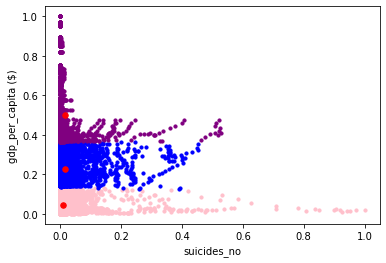

In [22]:
plt.scatter(normalized[y_kmeans == 0, 0], normalized[y_kmeans == 0, 1], s = 10, c = 'pink')
plt.scatter(normalized[y_kmeans == 1, 0], normalized[y_kmeans == 1, 1], s = 10, c = 'blue')
plt.scatter(normalized[y_kmeans == 2, 0], normalized[y_kmeans == 2, 1], s = 10, c = 'purple')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red')
plt.xlabel('suicides_no')
plt.ylabel('gdp_per_capita ($)')
plt.show()